In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

First we need to load the data

In [2]:
train_df = pd.read_csv('data/train.csv')

Next we can take a basic look at the data types and distributions

In [3]:
train_df.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36473 entries, 0 to 36472
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       36473 non-null  object 
 1   anchor   36473 non-null  object 
 2   target   36473 non-null  object 
 3   context  36473 non-null  object 
 4   score    36473 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


None of the columns have missing values. From the data page, the id is for the unique pair of anchor and target word/phrase. The context is the classification term assigned to the patent. The score is the value to be predicted.

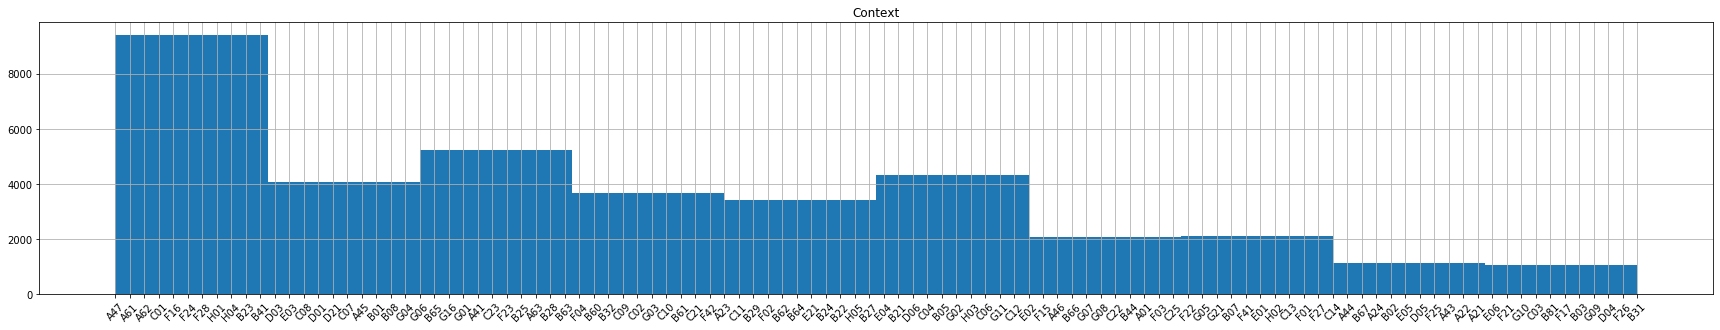

In [5]:
plt.figure(figsize=(30,5))
plt.xticks(rotation=45)
plt.title('Context')
train_df['context'].hist()

In [6]:
train_df['score'].describe()

count    36473.000000
mean         0.362062
std          0.258335
min          0.000000
25%          0.250000
50%          0.250000
75%          0.500000
max          1.000000
Name: score, dtype: float64

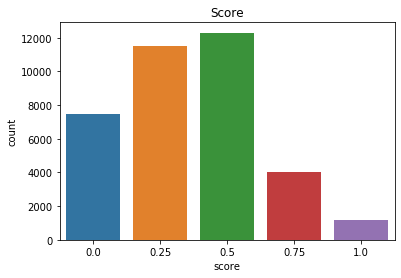

In [7]:
plt.title('Score')
sns.countplot(train_df['score'])

According to the data page, the scores mean:
* 1.0: very close match (eg singular and plural of same root word)
* 0.75: close synonym
* 0.5: synonym
* 0.25: somewhat related
* 0.0: unrelated

In [8]:
train_df.sort_values(by='score').groupby('score').head(1)

,id,anchor,target,context,score
29717,8f44e3c8e5ad8494,selection logic,selection line,F01,0.00
13957,5aedae0d7769b462,frame handle,alloy handle,A01,0.25
24466,f305a5241c675f85,pipe box,safety pipe box,C21,0.50
19532,059e97d3e4c027e7,materially less,greatly low,C03,0.75
14061,2dcb25b41d25cf29,free fatty acid,free fatty acids,B01,1.00


How many anchors are there?

In [9]:
len(train_df['anchor'].unique())

733

In [10]:
anchors = ' '.join(train_df['anchor'].tolist())

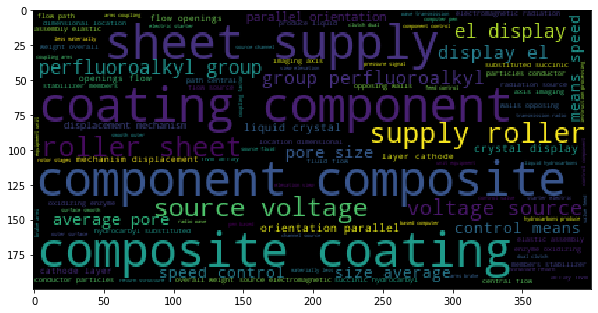

In [11]:
wordcloud = WordCloud().generate(anchors)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

How many targets are there?

In [12]:
len(train_df['target'].unique())

29340

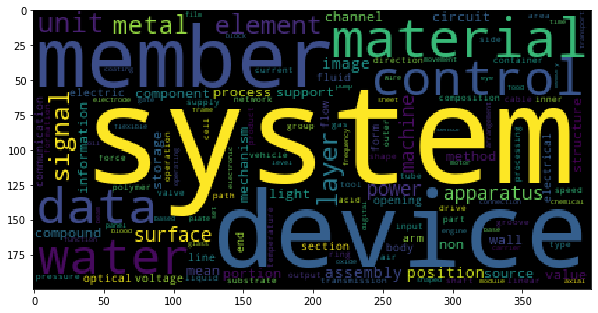

In [13]:
targets = ' '.join(train_df['target'].tolist())
wordcloud = WordCloud().generate(targets)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

How many targets have multiple anchors?

In [14]:
target_cnt = train_df.groupby('target')['anchor'].count().reset_index()

In [15]:
target_cnt[target_cnt['anchor']>1].shape

(4192, 2)

In [16]:
target_cnt[target_cnt['anchor']==1].shape

(25148, 2)

In [17]:
target_cnt[target_cnt['anchor']>1].sort_values(by='anchor')

,target,anchor
2,1 bromopropane,2
18500,panel data,2
18511,panel member,2
18515,panel support frame,2
18529,paper machine,2
...,...,...
1711,assembly,21
6533,data,22
15899,metal,22
16440,motor,22


How many targets does each anchor have?

In [18]:
anchor_cnt = train_df.groupby('anchor')['target'].count().reset_index()

In [19]:
anchor_cnt.head()

,anchor,target
0,abatement,49
1,abnormal position,82
2,absorbent properties,59
3,acan,23
4,accept information,32


In [21]:
anchor_cnt[anchor_cnt['target']==1].shape

(2, 2)

In [22]:
anchor_cnt[anchor_cnt['target']>1].shape

(731, 2)

In [24]:
anchor_cnt[anchor_cnt['target']>100].shape

(28, 2)

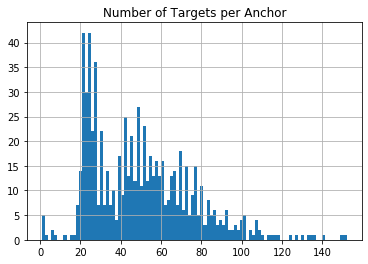

In [31]:
plt.title('Number of Targets per Anchor')
anchor_cnt['target'].hist(bins=100)

In [34]:
anchor_cnt['target'].describe()

count    733.000000
mean      49.758527
std       25.204580
min        1.000000
25%       27.000000
50%       47.000000
75%       66.000000
max      152.000000
Name: target, dtype: float64

In [35]:
anchor_cnt['target'].mode()

0    23
dtype: int64

How much overlap is there between anchors and targets?

In [38]:
print(set(train_df['anchor'].tolist()).intersection(set(train_df['target'].tolist())))

{'selected box', 'return structure', 'metal phase', 'embossing portion', 'exit electrode', 'high frequency welding', 'align with input shaft', 'elastic assembly', 'finger actuator', 'dual clutch', 'move towards left', 'shaped engaging', 'carry by platform', 'air flow line', 'overall weight', 'mayenite', 'package member', 'well pump', 'produce by pump', 'sun member', 'pendent', 'form rivets', 'cleaner system', 'water propeller', 'overflow compartment', 'tooth spaces', 'turbine machine', 'speed impeller', 'biomimetic', 'terephthalate polyester', 'microchambers', 'strand conveyor', 'lamination method', 'sheet supply roller', 'synthetic training', 'use voltage converter', 'control in steps', 'exhibit symmetry', 'opposing walls', 'arm roller', 'renewable power', 'trommel screen', 'output center', 'saw sensor', 'machine end', 'connect with conduits', 'rotate on its longitudinal axis', 'composite slurry', 'load distribution system', 'opaque walls', 'transmit to platform', 'lifting load', 'arr

In [39]:
len(set(train_df['anchor'].tolist()).intersection(set(train_df['target'].tolist())))

258